In [1]:
from learningAgents import ReinforceAlgorithm
from Environment import env, AdversaryModes
from NeuralNetwork import NeuralNetwork
import torch
import torch.nn as nn
from torch.distributions import Categorical
import time
import matplotlib.pyplot as plt

In [2]:
adversaryProbs=torch.zeros(len(AdversaryModes))
adversaryProbs[0]=1
game = env(total_demand = 400, tuple_costs = (57, 71), total_stages = 25, adversary_probabilities = adversaryProbs)

/Users/edwardplumb/opt/anaconda3/lib/python3.9/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


0
tensor([0.0201, 0.0178, 0.0196, 0.0201, 0.0184, 0.0209, 0.0176, 0.0228, 0.0197,
        0.0214, 0.0197, 0.0193, 0.0192, 0.0191, 0.0206, 0.0231, 0.0241, 0.0213,
        0.0212, 0.0186, 0.0215, 0.0204, 0.0197, 0.0215, 0.0208, 0.0209, 0.0206,
        0.0215, 0.0181, 0.0205, 0.0197, 0.0201, 0.0192, 0.0222, 0.0209, 0.0180,
        0.0189, 0.0169, 0.0184, 0.0189, 0.0208, 0.0185, 0.0190, 0.0200, 0.0191,
        0.0210, 0.0184, 0.0196, 0.0205, 0.0197], grad_fn=<SoftmaxBackward0>)
tensor([0.0196, 0.0176, 0.0193, 0.0197, 0.0182, 0.0208, 0.0182, 0.0212, 0.0202,
        0.0212, 0.0205, 0.0198, 0.0194, 0.0194, 0.0203, 0.0224, 0.0239, 0.0206,
        0.0209, 0.0183, 0.0230, 0.0204, 0.0199, 0.0214, 0.0211, 0.0200, 0.0201,
        0.0215, 0.0187, 0.0208, 0.0205, 0.0204, 0.0193, 0.0227, 0.0205, 0.0182,
        0.0186, 0.0174, 0.0190, 0.0191, 0.0208, 0.0186, 0.0196, 0.0195, 0.0190,
        0.0204, 0.0181, 0.0197, 0.0199, 0.0200], grad_fn=<SoftmaxBackward0>)
tensor([0.0194, 0.0175, 0.0195, 0.0199, 0.01

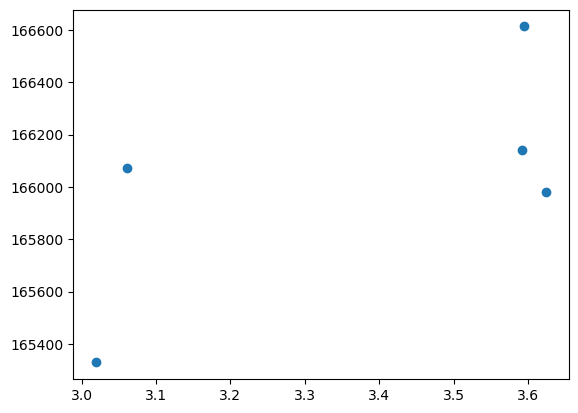

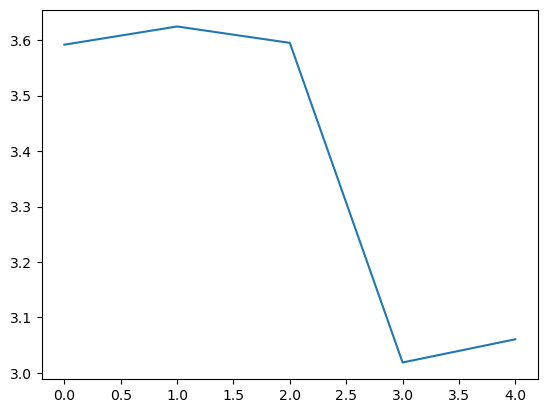

0.6890830993652344


In [3]:
st = time.time()
neuralNet=NeuralNetwork(lr = 0.0001, num_input= 2, num_actions=50, nn_dim = 150)
algorithm = ReinforceAlgorithm(game, neuralNet, numberBatches=5, numberEpiPerBatch=6, discountFactor =1, creditFactor = 1, numberIterations = 1)
result = algorithm.solver()
ft = time.time()
print(ft - st)

Not yet converged 4.578917548263791e-43


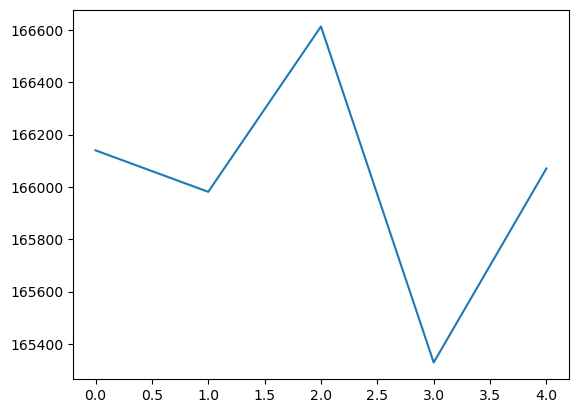

Best Payoff is  171279.4375
Best Actions are  [29 45 41 18 28  4 22 44 48 45 38 30 40 46  5 43 14 39 37 21 23  9 30 36
  1]


In [4]:
if result[3] > 0.9:
    print(result[1], result[2], result[3])
else:
    print("Not yet converged", result[3])
plt.plot(result[0][0])
plt.show()
print("Best Payoff is ", result[5])
print("Best Actions are ", result[4])

In [5]:
import pandas as pd
learning = pd.DataFrame(algorithm.returns.mean(axis = 0),columns=['entry'])

<AxesSubplot:>

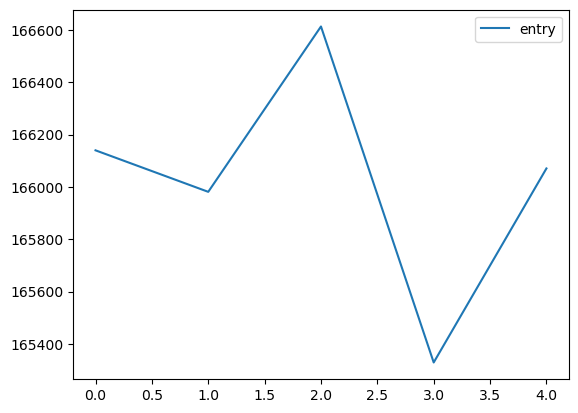

In [6]:
learning.plot()

In [7]:
learning.max()

entry    166613.197917
dtype: float64

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
learning = learning.to_numpy()

In [10]:
learning_2 = [0]*len(learning)
for i in range(len(learning_2)):
    learning_2[i] = learning[i][0]

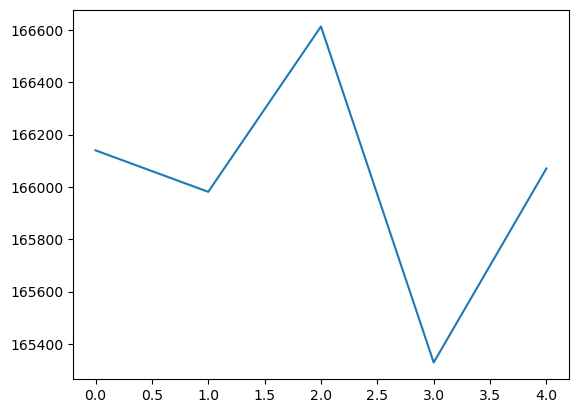

In [11]:
plt.plot(learning_2)
plt.show()

In [12]:
# avg_learning = np.convolve(learning_2, np.ones(1000)/1000, mode = 'valid')

In [13]:
# plt.plot(avg_learning)
# plt.show()